In [1]:
import os
for dirname, _, filenames in os.walk(r'C:\Users\koras\Downloads\abhi'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\koras\Downloads\abhi\annotations\maksssksksss0.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss1.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss10.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss100.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss101.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss102.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss103.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss104.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss105.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss106.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss107.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss108.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss109.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss11.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss110.xml
C:\Users\koras\Downloads\abhi\annotations\maksssksksss111.xml
C:\Users\koras

In [2]:
from glob import glob
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from sklearn.model_selection import train_test_split
from PIL import Image

In [3]:
masked_images = glob(os.path.join(r'C:\Users\koras\Downloads\abhi\images/*.png'))

In [4]:
len(masked_images)

853

In [5]:
masked_annotations = glob(os.path.join(r'C:\Users\koras\Downloads\abhi\annotations/*.xml'))

In [6]:
len(masked_annotations)

853

In [7]:
masked_annotations[0]


'C:\\Users\\koras\\Downloads\\abhi\\annotations\\maksssksksss0.xml'

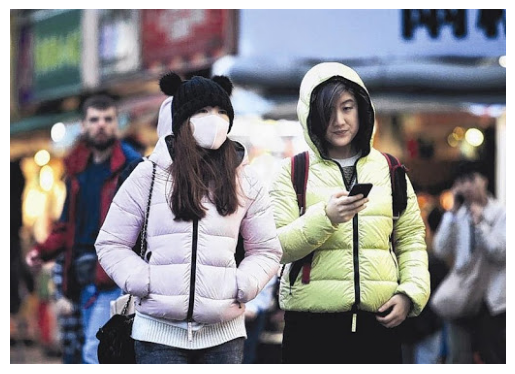

In [8]:
from PIL import Image
from matplotlib.image import imread
selected_image_index = 0 
selected_image_path = masked_images[selected_image_index]
selected_image = Image.open(selected_image_path)
selected_image = imread(selected_image_path)
plt.imshow(selected_image)
plt.axis('off')  
plt.show()

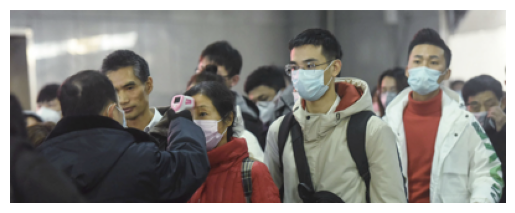

In [9]:
selected_image_index =1 
selected_image_path = masked_images[selected_image_index]
selected_image = Image.open(selected_image_path)
selected_image = imread(selected_image_path)
plt.imshow(selected_image)
plt.axis('off')  
plt.show()

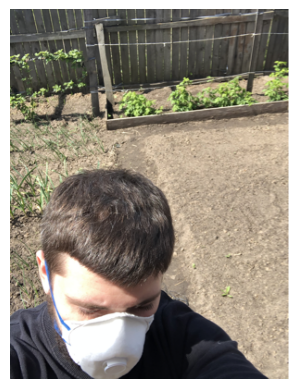

In [10]:
selected_image_index =4 
selected_image_path = masked_images[selected_image_index]
selected_image = Image.open(selected_image_path)
selected_image = imread(selected_image_path)
plt.imshow(selected_image)
plt.axis('off')  
plt.show()

In [11]:
annotations_data = pd.DataFrame()
for annotation in masked_annotations:
    tree = ET.parse(annotation)
    root = tree.getroot()
    counter = 0
    dic = dict()
    dic['Image_Name'] = root[1].text
    for i in range(4 , len(root)):
        temp = []
        temp.append(root[i][0].text)
        for point in root[i][5]:
            temp.append(point.text)
        dic['wear_mask ' + str(counter)] = temp
        counter += 1
        
        
    annotations_data = annotations_data.append(dic , ignore_index = True)
    counter = 0

C:\Users\koras\AppData\Local\Temp\ipykernel_5260\2676189610.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotations_data = annotations_data.append(dic , ignore_index = True)
C:\Users\koras\AppData\Local\Temp\ipykernel_5260\2676189610.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotations_data = annotations_data.append(dic , ignore_index = True)
C:\Users\koras\AppData\Local\Temp\ipykernel_5260\2676189610.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  annotations_data = annotations_data.append(dic , ignore_index = True)
C:\Users\koras\AppData\Local\Temp\ipykernel_5260\2676189610.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

In [12]:
annotations_data = annotations_data.fillna(5)

In [13]:
annotations_data.head()

,Image_Name,wear_mask 0,wear_mask 1,wear_mask 2,wear_mask 3,wear_mask 4,wear_mask 5,wear_mask 6,wear_mask 7,wear_mask 8,...,wear_mask 105,wear_mask 106,wear_mask 107,wear_mask 108,wear_mask 109,wear_mask 110,wear_mask 111,wear_mask 112,wear_mask 113,wear_mask 114
0,maksssksksss0.png,"[without_mask, 79, 105, 109, 142]","[with_mask, 185, 100, 226, 144]","[without_mask, 325, 90, 360, 141]",5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,maksssksksss1.png,"[with_mask, 321, 34, 354, 69]","[with_mask, 224, 38, 261, 73]","[with_mask, 299, 58, 315, 81]","[with_mask, 143, 74, 174, 115]","[with_mask, 74, 69, 95, 99]","[with_mask, 191, 67, 221, 93]","[with_mask, 21, 73, 44, 93]","[with_mask, 369, 70, 398, 99]","[without_mask, 83, 56, 111, 89]",...,5,5,5,5,5,5,5,5,5,5
2,maksssksksss10.png,"[with_mask, 98, 267, 194, 383]",5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,maksssksksss100.png,"[with_mask, 189, 30, 245, 88]","[with_mask, 387, 54, 400, 75]","[with_mask, 118, 87, 163, 126]",5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
4,maksssksksss101.png,"[with_mask, 48, 294, 164, 400]",5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [14]:
image_directory = r'C:\Users\koras\Downloads\abhi\images/'
labels = []
data = []
classes = ["without_mask" , "mask_weared_incorrect" , "with_mask"]
labels = []

In [15]:
for index , row in annotations_data.iterrows():
    img = cv2.imread(os.path.join(image_directory , row[0]))
    cv2.resize(img , (255 , 255))
    for obj in row[1:]:
        if obj != 5:
            label = obj[0]
            obj[0] = obj[0].replace(str(label) , str(classes.index(label)))
            obj=[int(each) for each in obj]
            face = img[obj[2]:obj[4],obj[1]:obj[3]]
            face = cv2.resize(face, (224, 224))
            face = img_to_array(face)
            face = preprocess_input(face)
            data.append(face)
            labels.append(label)
            if(label=="mask_weared_incorrect"):
                data.append(face)
                labels.append(label)

In [16]:
import numpy as np
data = np.array(data , dtype="float32")
labels = np.array(labels)

In [17]:
print(data.shape)
print(labels.shape)

(4195, 224, 224, 3)
(4195,)


In [18]:
lb = LabelEncoder()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels,test_size=0.2, stratify=labels, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(2684, 224, 224, 3)
(2684, 3)
(672, 224, 224, 3)
(672, 3)
(839, 224, 224, 3)
(839, 3)


In [21]:
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
activation_layer = Activation('relu')
from keras.optimizers import Adam

In [22]:
from keras.layers import LeakyReLU

In [23]:
from keras.models import Sequential

In [24]:
model = Sequential() 

model.add(Flatten(input_shape = (224 , 224 , 3))) 
model.add(Dense(200, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.5)) 

model.add(Dense(50, activation=LeakyReLU(alpha=0.3))) 
model.add(Dropout(0.3)) 

model.add(Dense(3 , activation = 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 200)               30105800  
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                10050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 30116003 (114.88 MB)
Trainable params: 301

In [26]:
INIT_LR = 1e-4
EPOCHS = 15
BS = 1

In [27]:
from tensorflow.keras.optimizers.legacy import Adam

optimizer = Adam(learning_rate=0.001, decay=1e-6) 

In [28]:
opt = Adam(lr = INIT_LR , decay = INIT_LR / EPOCHS)
model.compile(loss = "categorical_crossentropy" , optimizer = opt , metrics = ["accuracy"])
H = model.fit(X_train, Y_train , steps_per_epoch = len(X_train) // BS , validation_data = (X_val , Y_val) , validation_steps = len(X_val) // BS , epochs = EPOCHS)

C:\Users\koras\anaconda3\Lib\site-packages\keras\src\optimizers\legacy\adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
2684/2684 [==============================] - 581s 216ms/step - loss: 13.9242 - accuracy: 0.7761 - val_loss: 4.5037 - val_accuracy: 0.8750
Epoch 2/15
2684/2684 [==============================] - 532s 198ms/step - loss: 11.3421 - accuracy: 0.8189 - val_loss: 8.9477 - val_accuracy: 0.8646
Epoch 3/15
2684/2684 [==============================] - 491s 183ms/step - loss: 10.9189 - accuracy: 0.8301 - val_loss: 7.1652 - val_accuracy: 0.8676
Epoch 4/15
2684/2684 [==============================] - 413s 154ms/step - loss: 11.0079 - accuracy: 0.8379 - val_loss: 5.6421 - val_accuracy: 0.8854
Epoch 5/15
2684/2684 [==============================] - 362s 135ms/step - loss: 8.2296 - accuracy: 0.8525 - val_loss: 4.8518 - val_accuracy: 0.9003
Epoch 6/15
2684/2684 [==============================] - 370s 138ms/step - loss: 8.5700 - accuracy: 0.8465 - val_loss: 6.7445 - val_accuracy: 0.8690
Epoch 7/15
2684/2684 [==============================] - 352s 131ms/step - loss: 7.6342 - accuracy: 0.8640 - 

In [29]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
import seaborn as sns

In [30]:
y_pred = model.predict(X_test)

27/27 [==============================] - 1s 37ms/step


In [31]:
y_pred_new = np.argmax(y_pred , axis = 1) 
y_test_new = np.argmax(Y_test , axis = 1)

In [32]:
y_pred_new[:10]

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

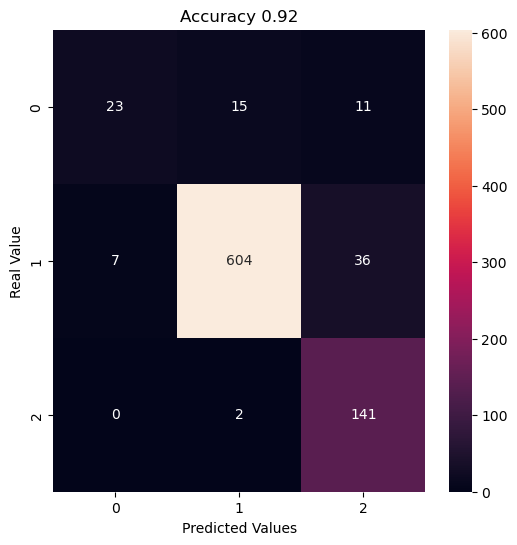

In [33]:
Confusion_Mtrx = metrics.confusion_matrix(y_test_new , y_pred_new)
#true_positive , false_positive, false_negative, true_negative = Confusion_Mtrx.ravel()

plt.figure(figsize=(6,6))
sns.heatmap(Confusion_Mtrx, annot=True, fmt=".0f");
plt.ylabel('Real Value');
plt.xlabel('Predicted Values');
plt.title('Accuracy {0:.2f}'.format(metrics.accuracy_score(y_test_new, y_pred_new)));